In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("df_with_outlier.csv", skipinitialspace=True)

In [3]:
df_test = pd.read_csv("df_test.csv", skipinitialspace=True)

### preprocessing

In [4]:
median_popularity = df['popularity'].median()
df['popularity_binary'] = (df['popularity'] > median_popularity).astype(int)

In [5]:
objects = df.select_dtypes(include='object').columns
objects

Index(['name', 'artists', 'album_name', 'genre'], dtype='object')

In [6]:
objects = df.select_dtypes(include='object').columns
to_drop = list(objects)[:-1]+['processing','popularity_confidence','features_duration_ms', 'popularity']
df = df.drop(columns = to_drop)

In [7]:
df.head()

,duration_min,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,genre,popularity_binary
0,0.056710,0,0.690,0.513,5,0.702298,1.0,0.0975,0.302000,0.53600,0.281,0.6350,0.644920,4.0,0.077164,0.064977,j-dance,1
1,0.105897,0,0.069,0.196,1,0.469376,0.0,0.0805,0.283000,0.93400,0.360,0.0336,0.342800,4.0,0.083968,0.071429,iranian,0
2,0.079024,0,0.363,0.854,2,0.798793,1.0,0.0397,0.000089,0.80000,0.262,0.4890,0.528865,4.0,0.088732,0.074654,black-metal,0
3,0.063530,0,0.523,0.585,5,0.833678,1.0,0.0765,0.066400,0.00127,0.117,0.3850,0.638839,4.0,0.084241,0.071429,bluegrass,0
4,0.072736,0,0.643,0.687,7,0.724866,1.0,0.0539,0.000576,0.09690,0.299,0.6370,0.652788,4.0,0.099755,0.084332,happy,1


In [8]:
nunique = df.nunique()
num = [col for col in df.columns if nunique[col] > 20]
for col in num:
    if col == 'instrumentalness':
        df[col] = pd.qcut(df[col], q=[0, 0.5, 0.65, 0.8, 1])
        continue
    df[col] = pd.qcut(df[col], 4)
df.head()

,duration_min,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,genre,popularity_binary
0,"(0.0533, 0.0682]",0,"(0.58, 0.695]","(0.48, 0.709]",5,"(-0.001, 0.738]",1.0,"(0.0886, 0.939]","(0.155, 0.573]","(0.287, 0.826]","(0.28, 0.994]","(0.416, 0.664]","(0.644, 1.0]",4.0,"(0.0627, 0.0851]","(0.0539, 0.0733]",j-dance,1
1,"(0.0682, 1.0]",0,"(-0.001, 0.441]","(-0.001, 0.48]",1,"(-0.001, 0.738]",0.0,"(0.051, 0.0886]","(0.155, 0.573]","(0.826, 1.0]","(0.28, 0.994]","(-0.001, 0.196]","(-0.001, 0.453]",4.0,"(0.0627, 0.0851]","(0.0539, 0.0733]",iranian,0
2,"(0.0682, 1.0]",0,"(-0.001, 0.441]","(0.709, 0.884]",2,"(0.738, 0.801]",1.0,"(0.0373, 0.051]","(-0.001, 0.00974]","(0.287, 0.826]","(0.131, 0.28]","(0.416, 0.664]","(0.453, 0.563]",4.0,"(0.0851, 1.0]","(0.0733, 1.0]",black-metal,0
3,"(0.0533, 0.0682]",0,"(0.441, 0.58]","(0.48, 0.709]",5,"(0.801, 0.843]",1.0,"(0.051, 0.0886]","(0.00974, 0.155]","(-0.001, 0.00313]","(0.0979, 0.131]","(0.196, 0.416]","(0.563, 0.644]",4.0,"(0.0627, 0.0851]","(0.0539, 0.0733]",bluegrass,0
4,"(0.0682, 1.0]",0,"(0.58, 0.695]","(0.48, 0.709]",7,"(-0.001, 0.738]",1.0,"(0.051, 0.0886]","(-0.001, 0.00974]","(0.00313, 0.287]","(0.28, 0.994]","(0.416, 0.664]","(0.644, 1.0]",4.0,"(0.0851, 1.0]","(0.0733, 1.0]",happy,1


In [9]:
cols = [col for col in df.columns if col != 'mode' and col != 'explicit' and col != 'popularity_binary']
for col in cols:
    df[col] = df[col].astype(str) + f"_{col}"

explicit_dict = {1: "explicit", 0: "not_explicit"}
df["explicit"] = df["explicit"].map(explicit_dict)

mode_dict = {0: "minor_mode", 1: "major_mode"}
df["mode"] = df["mode"].map(mode_dict)

pop_dict = {0: "not_popular", 1: "popular"}
df["popularity_binary"] = df["popularity_binary"].map(pop_dict)

df.head()

,duration_min,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,genre,popularity_binary
0,"(0.0533, 0.0682]_duration_min",not_explicit,"(0.58, 0.695]_danceability","(0.48, 0.709]_energy",5_key,"(-0.001, 0.738]_loudness",major_mode,"(0.0886, 0.939]_speechiness","(0.155, 0.573]_acousticness","(0.287, 0.826]_instrumentalness","(0.28, 0.994]_liveness","(0.416, 0.664]_valence","(0.644, 1.0]_tempo",4.0_time_signature,"(0.0627, 0.0851]_n_beats","(0.0539, 0.0733]_n_bars",j-dance_genre,popular
1,"(0.0682, 1.0]_duration_min",not_explicit,"(-0.001, 0.441]_danceability","(-0.001, 0.48]_energy",1_key,"(-0.001, 0.738]_loudness",minor_mode,"(0.051, 0.0886]_speechiness","(0.155, 0.573]_acousticness","(0.826, 1.0]_instrumentalness","(0.28, 0.994]_liveness","(-0.001, 0.196]_valence","(-0.001, 0.453]_tempo",4.0_time_signature,"(0.0627, 0.0851]_n_beats","(0.0539, 0.0733]_n_bars",iranian_genre,not_popular
2,"(0.0682, 1.0]_duration_min",not_explicit,"(-0.001, 0.441]_danceability","(0.709, 0.884]_energy",2_key,"(0.738, 0.801]_loudness",major_mode,"(0.0373, 0.051]_speechiness","(-0.001, 0.00974]_acousticness","(0.287, 0.826]_instrumentalness","(0.131, 0.28]_liveness","(0.416, 0.664]_valence","(0.453, 0.563]_tempo",4.0_time_signature,"(0.0851, 1.0]_n_beats","(0.0733, 1.0]_n_bars",black-metal_genre,not_popular
3,"(0.0533, 0.0682]_duration_min",not_explicit,"(0.441, 0.58]_danceability","(0.48, 0.709]_energy",5_key,"(0.801, 0.843]_loudness",major_mode,"(0.051, 0.0886]_speechiness","(0.00974, 0.155]_acousticness","(-0.001, 0.00313]_instrumentalness","(0.0979, 0.131]_liveness","(0.196, 0.416]_valence","(0.563, 0.644]_tempo",4.0_time_signature,"(0.0627, 0.0851]_n_beats","(0.0539, 0.0733]_n_bars",bluegrass_genre,not_popular
4,"(0.0682, 1.0]_duration_min",not_explicit,"(0.58, 0.695]_danceability","(0.48, 0.709]_energy",7_key,"(-0.001, 0.738]_loudness",major_mode,"(0.051, 0.0886]_speechiness","(-0.001, 0.00974]_acousticness","(0.00313, 0.287]_instrumentalness","(0.28, 0.994]_liveness","(0.416, 0.664]_valence","(0.644, 1.0]_tempo",4.0_time_signature,"(0.0851, 1.0]_n_beats","(0.0733, 1.0]_n_bars",happy_genre,popular


In [10]:
X = df.values.tolist()

X[0]

['(0.0533, 0.0682]_duration_min',
 'not_explicit',
 '(0.58, 0.695]_danceability',
 '(0.48, 0.709]_energy',
 '5_key',
 '(-0.001, 0.738]_loudness',
 'major_mode',
 '(0.0886, 0.939]_speechiness',
 '(0.155, 0.573]_acousticness',
 '(0.287, 0.826]_instrumentalness',
 '(0.28, 0.994]_liveness',
 '(0.416, 0.664]_valence',
 '(0.644, 1.0]_tempo',
 '4.0_time_signature',
 '(0.0627, 0.0851]_n_beats',
 '(0.0539, 0.0733]_n_bars',
 'j-dance_genre',
 'popular']

In [11]:
### preprocessing

median_popularity = df_test['popularity'].median()
df_test['popularity_binary'] = (df_test['popularity'] > median_popularity).astype(int)

objects = df_test.select_dtypes(include='object').columns
objects

objects = df_test.select_dtypes(include='object').columns
to_drop = list(objects)[:-1]+['processing','popularity_confidence','features_duration_ms', 'popularity']
df_test = df_test.drop(columns = to_drop)

df_test.head()

nunique = df_test.nunique()
num = [col for col in df_test.columns if nunique[col] > 20]
for col in num:
    if col == 'instrumentalness':
        df_test[col] = pd.qcut(df_test[col], q=[0, 0.5, 0.65, 0.8, 1])
        continue
    df_test[col] = pd.qcut(df_test[col], 4)
df_test.head()



cols = [col for col in df_test.columns if col != 'mode' and col != 'explicit' and col != 'popularity_binary']
for col in cols:
    df_test[col] = df_test[col].astype(str) + f"_{col}"

explicit_dict = {1: "explicit", 0: "not_explicit"}
df_test["explicit"] = df_test["explicit"].map(explicit_dict)

mode_dict = {0: "minor_mode", 1: "major_mode"}
df_test["mode"] = df_test["mode"].map(mode_dict)

pop_dict = {0: "not_popular", 1: "popular"}
df_test["popularity_binary"] = df_test["popularity_binary"].map(pop_dict)

df_test.head()

,duration_min,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,genre,popularity_binary
0,"(0.0436, 0.0576]_duration_min",not_explicit,"(-0.001, 0.438]_danceability","(0.879, 1.0]_energy",0_key,"(0.845, 1.0]_loudness",major_mode,"(0.0865, 0.943]_speechiness","(-0.001, 0.0093]_acousticness","(-0.001, 0.00351]_instrumentalness","(0.13, 0.282]_liveness","(0.661, 0.983]_valence","(0.454, 0.564]_tempo",4.0_time_signature,"(0.0551, 0.0771]_n_beats","(0.056, 0.0779]_n_bars",industrial_genre,popular
1,"(0.0742, 1.0]_duration_min",not_explicit,"(0.438, 0.574]_danceability","(0.468, 0.702]_energy",5_key,"(0.716, 0.794]_loudness",major_mode,"(0.0504, 0.0865]_speechiness","(0.157, 0.581]_acousticness","(0.826, 1.0]_instrumentalness","(0.0969, 0.13]_liveness","(-0.001, 0.196]_valence","(0.645, 1.0]_tempo",4.0_time_signature,"(0.105, 1.0]_n_beats","(0.106, 1.0]_n_bars",breakbeat_genre,popular
2,"(-0.001, 0.0436]_duration_min",not_explicit,"(0.574, 0.696]_danceability","(0.702, 0.879]_energy",9_key,"(0.845, 1.0]_loudness",major_mode,"(-0.001, 0.0365]_speechiness","(0.0093, 0.157]_acousticness","(-0.001, 0.00351]_instrumentalness","(0.13, 0.282]_liveness","(0.196, 0.402]_valence","(-0.001, 0.454]_tempo",4.0_time_signature,"(-0.001, 0.0551]_n_beats","(-0.001, 0.056]_n_bars",indian_genre,popular
3,"(0.0576, 0.0742]_duration_min",not_explicit,"(0.438, 0.574]_danceability","(0.879, 1.0]_energy",0_key,"(0.845, 1.0]_loudness",minor_mode,"(-0.001, 0.0365]_speechiness","(-0.001, 0.0093]_acousticness","(0.274, 0.826]_instrumentalness","(0.282, 0.992]_liveness","(0.661, 0.983]_valence","(0.564, 0.645]_tempo",4.0_time_signature,"(0.0771, 0.105]_n_beats","(0.0779, 0.106]_n_bars",j-idol_genre,not_popular
4,"(0.0436, 0.0576]_duration_min",not_explicit,"(0.696, 0.975]_danceability","(0.468, 0.702]_energy",1_key,"(0.716, 0.794]_loudness",major_mode,"(0.0865, 0.943]_speechiness","(-0.001, 0.0093]_acousticness","(0.00351, 0.274]_instrumentalness","(0.13, 0.282]_liveness","(0.402, 0.661]_valence","(0.564, 0.645]_tempo",4.0_time_signature,"(0.0551, 0.0771]_n_beats","(0.056, 0.0779]_n_bars",breakbeat_genre,not_popular


# Pattern Mining

## Apriori

In [14]:
# !pip install pyfim

In [12]:
from fim import apriori

In [115]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

frequent itemset >= min_supp
- **closed**: an itemset is closed if none of its immediate supersets has the same support as the itemset
- **maximal**: an itemset is maximal frequent if none of its immediate supersets is frequent

### Frequent Itemset

In [20]:
# supp = 2  # 2%
#supp = 20  # 20%
zmin = 2  # minimum number of items per item set
supps = list(range(5, 55))
itemsets = []
for supp in supps:
    itemset = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
    itemsets.append(itemset)
#pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

In [23]:
c=0
for i, e in enumerate(itemsets):
    print(f'---------- minsup = {supps[i]} ----------')
    print(f'# of potential itemsets: {len(e)} \n min_sup: {e[0]} \n max_sup: {e[-1]}')
    if c > 10:
        break
    c += 1

---------- minsup = 5 ----------
# of potential itemsets: 6786 
 min_sup: (('disney_genre', 'not_explicit'), 5.0) 
 max_sup: (('4.0_time_signature', 'not_explicit'), 82.64)
---------- minsup = 6 ----------
# of potential itemsets: 4286 
 min_sup: (('10_key', '4.0_time_signature'), 6.206666666666667) 
 max_sup: (('4.0_time_signature', 'not_explicit'), 82.64)
---------- minsup = 7 ----------
# of potential itemsets: 2679 
 min_sup: (('3.0_time_signature', 'not_explicit'), 7.366666666666667) 
 max_sup: (('4.0_time_signature', 'not_explicit'), 82.64)
---------- minsup = 8 ----------
# of potential itemsets: 1831 
 min_sup: (('9_key', '4.0_time_signature'), 8.506666666666666) 
 max_sup: (('4.0_time_signature', 'not_explicit'), 82.64)
---------- minsup = 9 ----------
# of potential itemsets: 1371 
 min_sup: (('9_key', 'not_explicit'), 9.033333333333333) 
 max_sup: (('4.0_time_signature', 'not_explicit'), 82.64)
---------- minsup = 10 ----------
# of potential itemsets: 1080 
 min_sup: (('0_k

### Closed Itemsets

In [288]:
# supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"((0.0539, 0.0733]_n_bars, (0.0627, 0.0851]_n_b...",22.146667
1,"((0.0539, 0.0733]_n_bars, (0.0627, 0.0851]_n_b...",21.580000
2,"((0.0539, 0.0733]_n_bars, (0.0627, 0.0851]_n_b...",20.253333
3,"((0.0539, 0.0733]_n_bars, (0.0627, 0.0851]_n_b...",20.793333
4,"((0.0539, 0.0733]_n_bars, 4.0_time_signature)",22.800000
...,...,...
161,"(not_popular, not_explicit)",46.486667
162,"(major_mode, 4.0_time_signature)",58.773333
163,"(major_mode, 4.0_time_signature, not_explicit)",55.446667
164,"(major_mode, not_explicit)",63.180000


### Maximal Itemsets

In [341]:
itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

,maximal_itemset,support
0,"((0.0539, 0.0733]_n_bars, (0.0627, 0.0851]_n_b...",20.253333
1,"((0.131, 0.28]_liveness, 4.0_time_signature, n...",20.306667
2,"((0.695, 0.98]_danceability, 4.0_time_signatur...",22.026667
3,"((0.0851, 1.0]_n_beats, (0.0733, 1.0]_n_bars, ...",20.473333
4,"((0.664, 0.995]_valence, 4.0_time_signature, n...",22.520000
5,"((0.709, 0.884]_energy, 4.0_time_signature, no...",21.746667
6,"((0.0373, 0.051]_speechiness, 4.0_time_signatu...",21.266667
7,"((0.051, 0.0886]_speechiness, 4.0_time_signatu...",21.193333
8,"((0.573, 0.996]_acousticness, not_explicit)",24.493333
9,"((0.0382, 0.0539]_n_bars, (0.0445, 0.0627]_n_b...",20.980000


### Support plots

#### Support vs number of itemsets

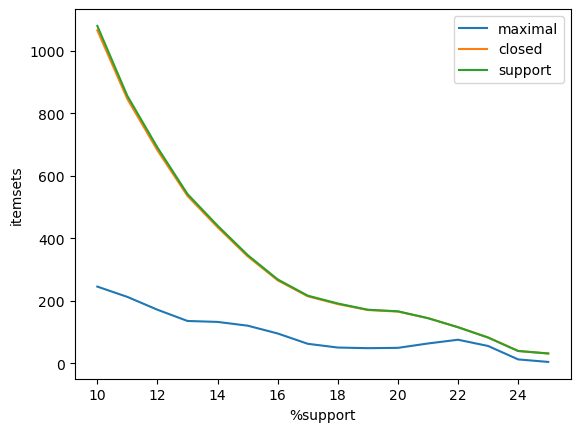

In [358]:
len_max_it = []
len_cl_it = []
len_it = []
max_supp = 26
for i in range(10, max_supp):
    itemsets = apriori(X, target="s", supp=i, zmin=zmin)
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))
    len_it.append(len(itemsets))
    
plt.plot(np.arange(10, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(10, max_supp), len_cl_it, label="closed")
plt.plot(np.arange(10, max_supp), len_it, label="support")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

In [329]:
def class_support_plot(min_supp, max_supp, zmin, cls, **kwargs):
    
    filters = []
    for _ in cls:
        filters.append([])

    for i in range(min_supp, max_supp+1):
        max_itemsets = apriori(X, supp=i, zmin=zmin, **kwargs)
        for j, c in enumerate(cls):
            filters[j].append(len([item for item in max_itemsets if c in item[0]]))
    
    for i, c in enumerate(cls):
        plt.plot(np.arange(min_supp, max_supp+1), filters[i], label= f"w/ {c}")
    
    plt.legend()
    plt.xticks()
    plt.xlabel("%dsupport")
    plt.ylabel("itemsets")
    plt.title('maximal closed itemset for popularity')

    plt.show()

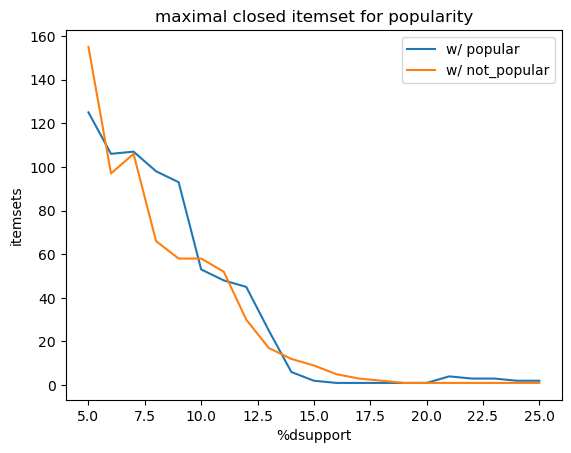

In [346]:
class_support_plot(5, 25, 2, ['popular', 'not_popular'], target = 'm')

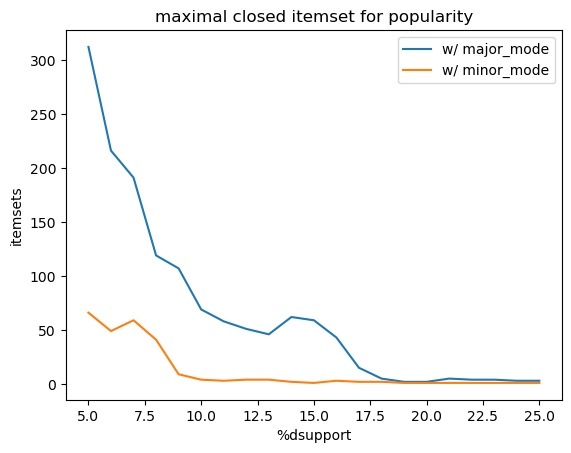

In [347]:
class_support_plot(5, 25, 2, df['mode'].unique(), target = 'm')

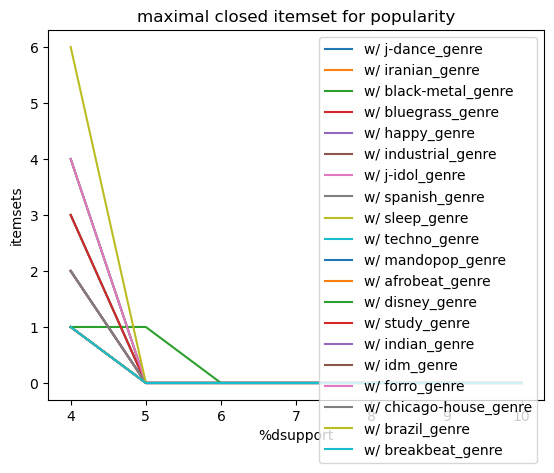

In [350]:
class_support_plot(4, 10, 2, df['genre'].unique(), target = 'm')

### Rules

In [23]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

if the target is association rules:
                a list of rules (i.e. tuples with two or more elements),
                each consisting of a head/consequent item, a tuple with
                a body/antecedent item set, and the values selected by
                the parameter 'report', which may be combined into a
                tuple or a list if report[0] is '(' or '[', respectively.

In [13]:
def rules(X, **kwargs):
    
    rule = apriori(X, **kwargs)
        
    rules_df = pd.DataFrame(
    rule,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
    rules_df = rules_df[rules_df['lift'] > 1].sort_values(by="lift", axis=0, ascending=False)
    
    return rules_df

#### hyper parameter tuning 

In [661]:
supps = list(range(5, 30, 5))
confs = list(range(75, 96, 5))
zmins = list(range(2, 6))
store = {'supp':[], 'zmin':[], 'size': [], 'conf':[], 'avg_lift': []}
#rules = []
for supp in supps:
    for zmin in zmins:
        for conf in confs:
            
            rules_df = rules(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl") 
            
            store["avg_lift"].append(rules_df["lift"].mean())
            store['supp'].append(supp)
            store['zmin'].append(zmin)
            store['conf'].append(conf)
            store['size'].append(rules_df.shape[0])
            
            #print(f'supp: {supp}, zmin: {zmin}, size: {rules_df.shape[0]}, conf: {conf}% , avg_lift: {rules_df["lift"].mean()}')

In [662]:
df_store = pd.DataFrame(store)
df_store = df_store.sort_values(by='avg_lift', ascending=False)
df_store.loc[df_store['avg_lift'].nlargest(10).index]

,supp,zmin,size,conf,avg_lift
59,15,5,3,95,2.979157
39,10,5,54,95,2.426924
15,5,5,3140,75,2.360052
16,5,5,2395,80,2.340971
38,10,5,94,90,2.327742
19,5,5,1078,95,2.286065
17,5,5,2110,85,2.282196
37,10,5,105,85,2.263414
54,15,4,26,95,2.251586
18,5,5,1915,90,2.251000


In [15]:
rules_5 = rules(X, target="r", supp=5, zmin=5, conf=75, report="aScl")

In [18]:
pd.set_option('display.max_colwidth', None)
rules_5

,consequent,antecedent,abs_support,%_support,confidence,lift
176,"(0.0539, 0.0733]_n_bars","((0.0533, 0.0682]_duration_min, (0.563, 0.644]_tempo, (0.0627, 0.0851]_n_beats, 4.0_time_signature, not_explicit)",862,5.746667,0.990805,4.033126
180,"(0.0539, 0.0733]_n_bars","((0.0533, 0.0682]_duration_min, (0.563, 0.644]_tempo, (0.0627, 0.0851]_n_beats, 4.0_time_signature)",897,5.980000,0.990066,4.030120
632,"(0.0851, 1.0]_n_beats","((0.0733, 1.0]_n_bars, (0.884, 1.0]_energy, 4.0_time_signature, not_explicit)",1062,7.080000,1.000000,4.012841
919,"(0.0851, 1.0]_n_beats","((0.0733, 1.0]_n_bars, (0.00974, 0.155]_acousticness, 4.0_time_signature, not_explicit)",856,5.706667,1.000000,4.012841
845,"(0.0851, 1.0]_n_beats","((0.0733, 1.0]_n_bars, (0.644, 1.0]_tempo, major_mode, 4.0_time_signature)",993,6.620000,1.000000,4.012841
...,...,...,...,...,...,...
2132,not_explicit,"((0.0445, 0.0627]_n_beats, (0.0417, 0.0533]_duration_min, major_mode, 4.0_time_signature)",905,6.033333,0.935884,1.000304
603,not_explicit,"((0.0851, 1.0]_n_beats, (0.0733, 1.0]_n_bars, (0.884, 1.0]_energy, (0.0682, 1.0]_duration_min)",802,5.346667,0.935823,1.000238
2367,not_explicit,"((0.843, 1.0]_loudness, (0.00974, 0.155]_acousticness, major_mode, 4.0_time_signature)",786,5.240000,0.935714,1.000122
461,not_explicit,"((0.131, 0.28]_liveness, popular, (-0.001, 0.00313]_instrumentalness, major_mode)",887,5.913333,0.935654,1.000058


#### without size

In [717]:
supps = list(range(5, 30, 5))
confs = list(range(50, 96, 5))
zmin = 2
store = {'supp':[], 'size': [], 'conf':[], 'avg_lift': []}
#rules = []
for supp in supps:
    for conf in confs:

        rules_df = rules(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl") 

        store["avg_lift"].append(rules_df["lift"].mean())
        store['supp'].append(supp)
        store['conf'].append(conf)
        store['size'].append(rules_df.shape[0])

In [718]:
df_store = pd.DataFrame(store)
df_store = df_store.sort_values(by='avg_lift', ascending=False)
df_store.loc[df_store['avg_lift'].nlargest(10).index]

,supp,size,conf,avg_lift
5,5,8745,75,2.030947
4,5,11710,70,1.985366
6,5,7333,80,1.971263
3,5,14989,65,1.914749
7,5,6763,85,1.902450
9,5,2959,95,1.901032
2,5,17580,60,1.900291
1,5,21142,55,1.861405
8,5,6015,90,1.860647
19,10,340,95,1.821888


In [742]:
rules_5_2 = rules(X, target="r", supp=5, zmin=2, conf=75, report="aScl")

In [743]:
rules_5_2[rules_5_2["consequent"] == 'popular'].sort_values(by='lift', ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
60,popular,"(brazil_genre,)",682,4.546667,0.909333,1.822555
52,popular,"(indian_genre,)",663,4.420000,0.884000,1.771780
67,popular,"(forro_genre,)",639,4.260000,0.852000,1.707643
13,popular,"(spanish_genre,)",637,4.246667,0.849333,1.702298
30,popular,"(mandopop_genre,)",622,4.146667,0.829333,1.662213
9806,popular,"((0.196, 0.416]_valence, (-0.001, 0.0373]_speechiness, (-0.001, 0.00313]_instrumentalness, not_explicit)",617,4.113333,0.785987,1.575335
9808,popular,"((0.196, 0.416]_valence, (-0.001, 0.0373]_speechiness, (-0.001, 0.00313]_instrumentalness)",621,4.140000,0.785082,1.573521
25,popular,"(sleep_genre,)",586,3.906667,0.781333,1.566007
9667,popular,"((0.48, 0.709]_energy, (-0.001, 0.0373]_speechiness, (-0.001, 0.00313]_instrumentalness, 4.0_time_signature)",681,4.540000,0.775626,1.554569
9665,popular,"((0.48, 0.709]_energy, (-0.001, 0.0373]_speechiness, (-0.001, 0.00313]_instrumentalness, 4.0_time_signature, not_explicit)",674,4.493333,0.775604,1.554525


### Classification

In [390]:
pd.set_option('display.max_colwidth', None)

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [651]:
rules_5[rules_5["consequent"] == 'popular'].sort_values(by='%_support', ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
3599,popular,"((-0.001, 0.0373]_speechiness, (-0.001, 0.00313]_instrumentalness, major_mode, not_explicit)",1425,9.500000,0.757979,1.519198
3595,popular,"((-0.001, 0.0373]_speechiness, (-0.001, 0.00313]_instrumentalness, major_mode, 4.0_time_signature)",1308,8.720000,0.758701,1.520645
3591,popular,"((-0.001, 0.0373]_speechiness, (-0.001, 0.00313]_instrumentalness, major_mode, 4.0_time_signature, not_explicit)",1300,8.666667,0.759346,1.521938
3158,popular,"((0.48, 0.709]_energy, (-0.001, 0.0373]_speechiness, (-0.001, 0.00313]_instrumentalness, not_explicit)",714,4.760000,0.774403,1.552118
2458,popular,"((0.0533, 0.0682]_duration_min, (-0.001, 0.0373]_speechiness, (-0.001, 0.00313]_instrumentalness, not_explicit)",685,4.566667,0.755237,1.513703
3156,popular,"((0.48, 0.709]_energy, (-0.001, 0.0373]_speechiness, (-0.001, 0.00313]_instrumentalness, 4.0_time_signature)",681,4.540000,0.775626,1.554569
3154,popular,"((0.48, 0.709]_energy, (-0.001, 0.0373]_speechiness, (-0.001, 0.00313]_instrumentalness, 4.0_time_signature, not_explicit)",674,4.493333,0.775604,1.554525
3416,popular,"((-0.001, 0.48]_energy, (-0.001, 0.0373]_speechiness, (-0.001, 0.00313]_instrumentalness, not_explicit)",646,4.306667,0.754673,1.512573
2456,popular,"((0.0533, 0.0682]_duration_min, (-0.001, 0.0373]_speechiness, (-0.001, 0.00313]_instrumentalness, 4.0_time_signature)",641,4.273333,0.755006,1.513240
2454,popular,"((0.0533, 0.0682]_duration_min, (-0.001, 0.0373]_speechiness, (-0.001, 0.00313]_instrumentalness, 4.0_time_signature, not_explicit)",637,4.246667,0.754739,1.512706


In [478]:
top10_pop

,consequent,antecedent,abs_support,%_support,confidence,lift
208,popular,"(brazil_genre, (-0.001, 0.00313]_instrumentalness, 4.0_time_signature)",597,3.980000,0.928460,1.860891
213,popular,"(brazil_genre, (-0.001, 0.00313]_instrumentalness)",634,4.226667,0.926901,1.857764
211,popular,"(brazil_genre, (-0.001, 0.00313]_instrumentalness, not_explicit)",582,3.880000,0.926752,1.857466
218,popular,"(brazil_genre, 4.0_time_signature)",641,4.273333,0.914408,1.832726
216,popular,"(brazil_genre, 4.0_time_signature, not_explicit)",595,3.966667,0.912577,1.829055
221,popular,"(brazil_genre,)",682,4.546667,0.909333,1.822555
220,popular,"(brazil_genre, not_explicit)",626,4.173333,0.907246,1.818372
192,popular,"(indian_genre, 4.0_time_signature, not_explicit)",573,3.820000,0.891135,1.786081
194,popular,"(indian_genre, 4.0_time_signature)",583,3.886667,0.890076,1.783958
196,popular,"(indian_genre, not_explicit)",651,4.340000,0.884511,1.772804


### prediction using discovered rule

In [506]:
objects = df_test.select_dtypes(include='object').columns
to_drop = list(objects)+['processing','popularity_confidence','features_duration_ms']
to_drop

['name',
 'artists',
 'album_name',
 'genre',
 'popularity_binary',
 'processing',
 'popularity_confidence',
 'features_duration_ms']

In [524]:
test = df_test.drop(columns = to_drop)
test['genre'] = df_test['genre']
X_test = test.values.tolist()

In [510]:
y_test = df_test['popularity_binary']

In [696]:
pop = rules_5[rules_5["consequent"] == 'popular'].sort_values(by='%_support', ascending=False)

In [705]:
ante = pop.iloc[0][1]

In [707]:
ante

('(-0.001, 0.0373]_speechiness',
 '(-0.001, 0.00313]_instrumentalness',
 'major_mode',
 'not_explicit')

In [711]:
l = []
for e in ante:
    l.append(e[e.rfind('_')+1:])

for e in l:
    print(test.columns.get_loc(e))

8
10
7
1


In [714]:
y_pred = []
for row in X_test:
    if (row[8] <= 0.0373) and (row[10] <= 0.00313) and (row[7] == 1) and (row[1] == 0):
        y_pred.append('popular')
    else:
        y_pred.append('not_popular')

In [716]:
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

 not_popular       0.56      0.94      0.70      2594
     popular       0.76      0.22      0.34      2406

    accuracy                           0.59      5000
   macro avg       0.66      0.58      0.52      5000
weighted avg       0.66      0.59      0.53      5000

